# Evaluate Model

---

## init


In [2]:
! pip install pandas
! pip install transformers
! pip install seaborn
! pip install matplotlib
! pip install numpy
! pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 6.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.8/337.8 kB 7.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.8 MB/s eta 0:00:00


In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import pipeline
import evaluate

/Users/tree/miniconda3/envs/Ki-Lab3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# paths
root = './'
trainingCsv = root + 'trainingRuns/TrainRuns-DriveSync/22_12_04_Run_03_E40_BS_2/training_stats.csv'
savedModel = root + 'trainingRuns/TrainRuns-DriveSync/22_12_04_Run_03_E40_BS_2/model_save/'
testLyricsCsv = root + 'datasets/lyrics_test_samples.csv'

---

## Load training results

In [3]:
# load trainin.csv
df_stats = pd.read_csv(trainingCsv)
df_stats = df_stats.set_index('epoch')
df_stats.head()

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,3.107663,2.243163,0:12:58,0:00:25
2,2.262813,2.161934,0:12:59,0:00:25
3,2.185318,2.123773,0:12:56,0:00:25
4,2.130808,2.104006,0:12:55,0:00:25
5,2.088739,2.090042,0:12:58,0:00:25


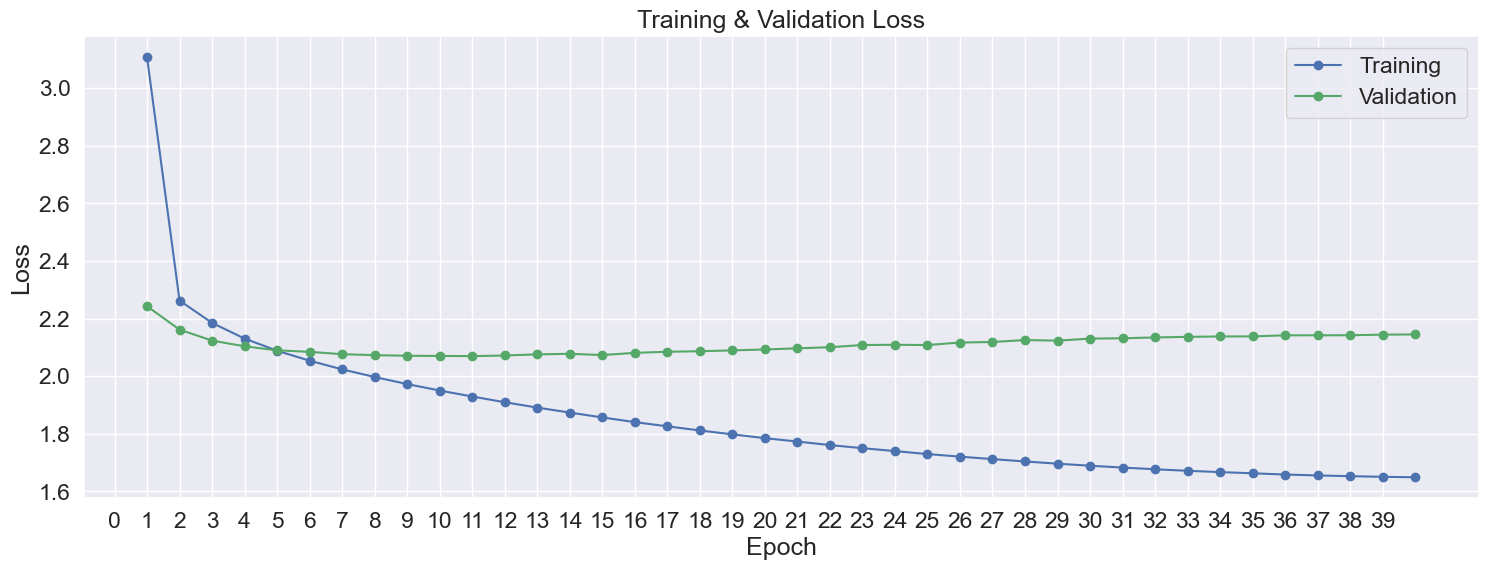

In [4]:
# Plot graph
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (18,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(np.arange(len(df_stats)))

plt.show()

---

## Load model


In [5]:
# load model from file
tokenizer = GPT2Tokenizer.from_pretrained('gpt2') #gpt2-medium
model = GPT2LMHeadModel.from_pretrained(savedModel)

model.resize_token_embeddings(len(tokenizer))

'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /gpt2/resolve/main/vocab.json (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required')))' thrown while requesting HEAD https://huggingface.co/gpt2/resolve/main/vocab.json


ProxyError: HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /gpt2/resolve/main/vocab.json (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 Proxy Authentication Required')))

In [ ]:
# pipline for text generation

lyrics_pipeline = pipeline('text-generation',model=model, tokenizer=tokenizer)

song_input = 'can you give me a song about love?'

result = lyrics_pipeline(song_input, max_length=1024,min_length=512)[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [17]:
print(result)

can you give me a song about love? Oh no I dont even know if that really matters
Its like the moment you left me
Where youre trying to tell me yeah well who am I to say
It may be simple but it goes to that other level
Im not trying to just throw shade at you or try to paint you with a brush
But in this particular moment I lost you
And youve seen what it does to a man before
I dont owe you anything but for my own good
Im trying to tell you
Please tell me why
When you said you wanted me the most
What would it do you would believe me
And then suddenly suddenly come around to me oh
My love is gone you are gone
And youve got to find out who is who to say
And in this particular moment I lost you
And youve got to show me
You see what the hurt does make you feel
A lot of men arent even tryna live up to expectations
So why does it always happen to me
When I see the mirror when the mirror says leave out
And then suddenly come around to me oh
My love is gone you are gone
And youve got to find out

In [18]:
x = tokenizer(result)

In [19]:
print(len(x['input_ids']))

667


---

## Calculate BLEU Score

In [20]:
lyrics_test_df = pd.read_csv(testLyricsCsv)
lyrics_test_df = lyrics_test_df.drop(['Unnamed: 0'], axis=1)

In [21]:
lyrics_test_df.head()

,Lyrics,True_end_lyrics,Lyrics_Cut
0,The Queen of Light took her bow And then she t...,now Bring it bring it bring it bring it Bring ...,The Queen of Light took her bow And then she t...
1,Rhiannon rings like a bell through the night A...,by taken by the sky Taken by taken by the sky ...,Rhiannon rings like a bell through the night A...
2,TranslationsPortugus Swaying room as the music...,crazy for you And you know its true Yeah Im cr...,TranslationsPortugus Swaying room as the music...
3,Louise take it all back to town Aint it a sham...,do Louise Louise ooh Ooh ooh ooh oh Louise ooh...,Louise take it all back to town Aint it a sham...
4,How can you refuse Him now how can you refuse ...,How can you turn away from His side With tears...,How can you refuse Him now how can you refuse ...


In [22]:
# Cut so that there are only 10 samples
lyrics_test_df = lyrics_test_df.drop(lyrics_test_df.index[10:])

In [26]:
# Wird wahrscheinlich sehr lange laufen
predictions = []
references = []

# TODO: Umschreiben, sodass nur der generierte Teil verglichen wird

for row in lyrics_test_df.iterrows():
    # Append original songtext
    references.append(row[1][0])
    # Find out how many tokens to generate
    tokenized_lyric = tokenizer(row[1][0])
    output_length = len(tokenized_lyric['input_ids'])
    # Generate Song lyrics based on cutted lyrics
    result = lyrics_pipeline(row[1][2], max_length=output_length, min_length=output_length)[0]['generated_text']
    predictions.append(result)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [28]:
print(predictions)
print(references)

['The Queen of Light took her bow And then she turned to go The Prince of Peace embraced the gloom And walked the night alone Oh dance in the dark of night Sing to the morning light The dark Lord rides in force tonight And time will tell us all Oh throw down your plow and hoe Rest not to lock your homes Side by side we wait the might of the darkest of them all Ohoh I hear the horses thunder down in the valley below Im waiting for the angels of Avalon Waiting for the eastern glow The apples of the valley hold the seeds of happiness The ground is rich from tender care Repay do not forget no no Dance in the dark of night Sing to the morning light The apples turn to brown and black The tyrants face is red Oh war is the common cry Pick up your swords and fly The sky is filled with good and bad Mortals never know oh Oh well the night is long the beads of time pass slow Tired eyes on the sunrise Waiting for the eastern glow The pain of war cannot exceed The woe of aftermath The drums will sha

In [29]:
bleu = evaluate.load("bleu")

In [30]:
results = bleu.compute(predictions=predictions, references=references)
print(results)

{'bleu': 0.9433602381278325, 'precisions': [0.9516177804656789, 0.9447983014861996, 0.9425007605719501, 0.9414098260604211], 'brevity_penalty': 0.9981873116750484, 'length_ratio': 0.9981889526109267, 'translation_length': 3307, 'reference_length': 3313}


---

## Prompting

Sebastians part!

---

## Demo lyrics generation

Bennys part!